In [2]:
import matplotlib.pyplot as plt
import numpy as np
import vegas


In [3]:
print(vegas.__version__)

5.1.1


In [4]:
def g(x):
    try:
        a = x[:,-1]
    except:
        a = x[-1]
    return a

In [11]:
integ = vegas.Integrator([[0, 1]]*1)
#result = integ(g, nitn=10, neval=10000) #beta=0 means uniform sampling over all hcubes
result = integ(g, nitn=10, neval=10000, beta=0)
print(result.summary())

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.50000102(59)  0.50000102(59)      0.00     1.00
  2   0.49999992(59)  0.50000048(42)      1.74     0.19
  3   0.49999969(68)  0.50000026(36)      1.36     0.26
  4   0.49999993(80)  0.50000021(32)      0.95     0.41
  5   0.50000028(99)  0.50000021(31)      0.72     0.58
  6   0.5000006(13)   0.50000024(30)      0.59     0.71
  7   0.4999996(14)   0.50000021(29)      0.53     0.79
  8   0.5000019(20)   0.50000024(29)      0.54     0.80
  9   0.5000005(38)   0.50000024(29)      0.48     0.87
 10   0.5000015(41)   0.50000025(29)      0.43     0.92



In [12]:
samples = []
for x, _ in integ.random_batch():
    samples.append(x)
    
allx = np.concatenate(samples)

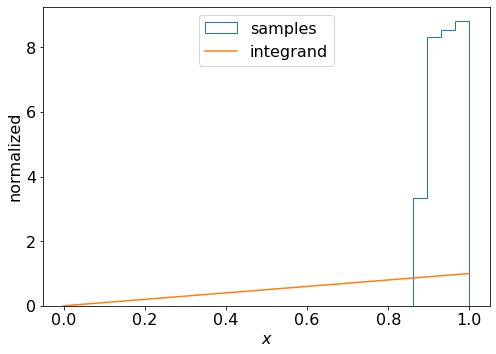

In [24]:
FONTSIZE=16
plt.rcParams.update({'font.size':FONTSIZE})

fig = plt.figure(figsize=(8,5.5))
bins = np.linspace(0,1,30)
plt.hist(allx[:,-1], bins=bins, histtype='step', density=True, label='samples')
plt.xlabel(r'$x$')
plt.ylabel('normalized')

#plot integrand
x = np.linspace(0,1,100).reshape(-1,1)
plt.plot(x, g(x), label='integrand')
plt.legend(loc='upper center')
plt.show()